## EXPLORACIÓN DE DATOS(ML)


In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest, f_regression



Paso el dataset a dataframe

In [176]:
train_data = pd.read_csv("../data/raw/internal-link.csv") 

df = train_data.copy().reset_index(drop=True)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


que tipo de dato tenemos?

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [178]:
df.shape

(48895, 16)

In [179]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [180]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [181]:
df.drop("id", axis=1).duplicated().sum()

np.int64(0)

no hay duplicados

NULOS

In [182]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [183]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df = df[df['price'] > 0].reset_index(drop=True)


df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48884.0,1.901679e+07,1.098432e+07,2539.00000,9.470548e+06,1.967574e+07,2.915297e+07,3.648724e+07
host_id,48884.0,6.762203e+07,7.861666e+07,2438.00000,7.817310e+06,3.079257e+07,1.074344e+08,2.743213e+08
latitude,48884.0,4.072895e+01,5.453177e-02,40.49979,4.069010e+01,4.072308e+01,4.076312e+01,4.091306e+01
longitude,48884.0,-7.395218e+01,4.615874e-02,-74.24442,-7.398308e+01,-7.395569e+01,-7.393629e+01,-7.371299e+01
price,48884.0,1.527551e+02,2.401703e+02,10.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48884.0,7.029887e+00,2.051222e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48884.0,2.327199e+01,4.455133e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,48884.0,1.090800e+00,1.597213e+00,0.00000,4.000000e-02,3.700000e-01,1.580000e+00,5.850000e+01
calculated_host_listings_count,48884.0,7.144628e+00,3.295619e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48884.0,1.127795e+02,1.316273e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


# Observaciones:
hay 16 tipos de datos recolectados 

la unica variable que no coincide son los conteos de reviews

El dataset contiene información sobre alojamientos en Nueva York (Airbnb).

Incluye precios, tipo de habitación, zona, número de reseñas y disponibilidad.

Se observan pocas columnas con valores nulos 

## Eliminamos variables innecesarias

In [184]:
cols_to_drop = ['id', 'name', 'host_id', 'host_name']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])


Analisis univariado


In [185]:
num_df = df.select_dtypes(include=[np.number])
num_df.describe().T


,count,mean,std,min,25%,50%,75%,max
latitude,48884.0,40.728953,0.054532,40.49979,40.69010,40.723080,40.76312,40.91306
longitude,48884.0,-73.952176,0.046159,-74.24442,-73.98308,-73.955685,-73.93629,-73.71299
price,48884.0,152.755053,240.170260,10.00000,69.00000,106.000000,175.00000,10000.00000
minimum_nights,48884.0,7.029887,20.512224,1.00000,1.00000,3.000000,5.00000,1250.00000
number_of_reviews,48884.0,23.271991,44.551331,0.00000,1.00000,5.000000,24.00000,629.00000
reviews_per_month,48884.0,1.090800,1.597213,0.00000,0.04000,0.370000,1.58000,58.50000
calculated_host_listings_count,48884.0,7.144628,32.956185,1.00000,1.00000,1.000000,2.00000,327.00000
availability_365,48884.0,112.779498,131.627271,0.00000,0.00000,45.000000,227.00000,365.00000


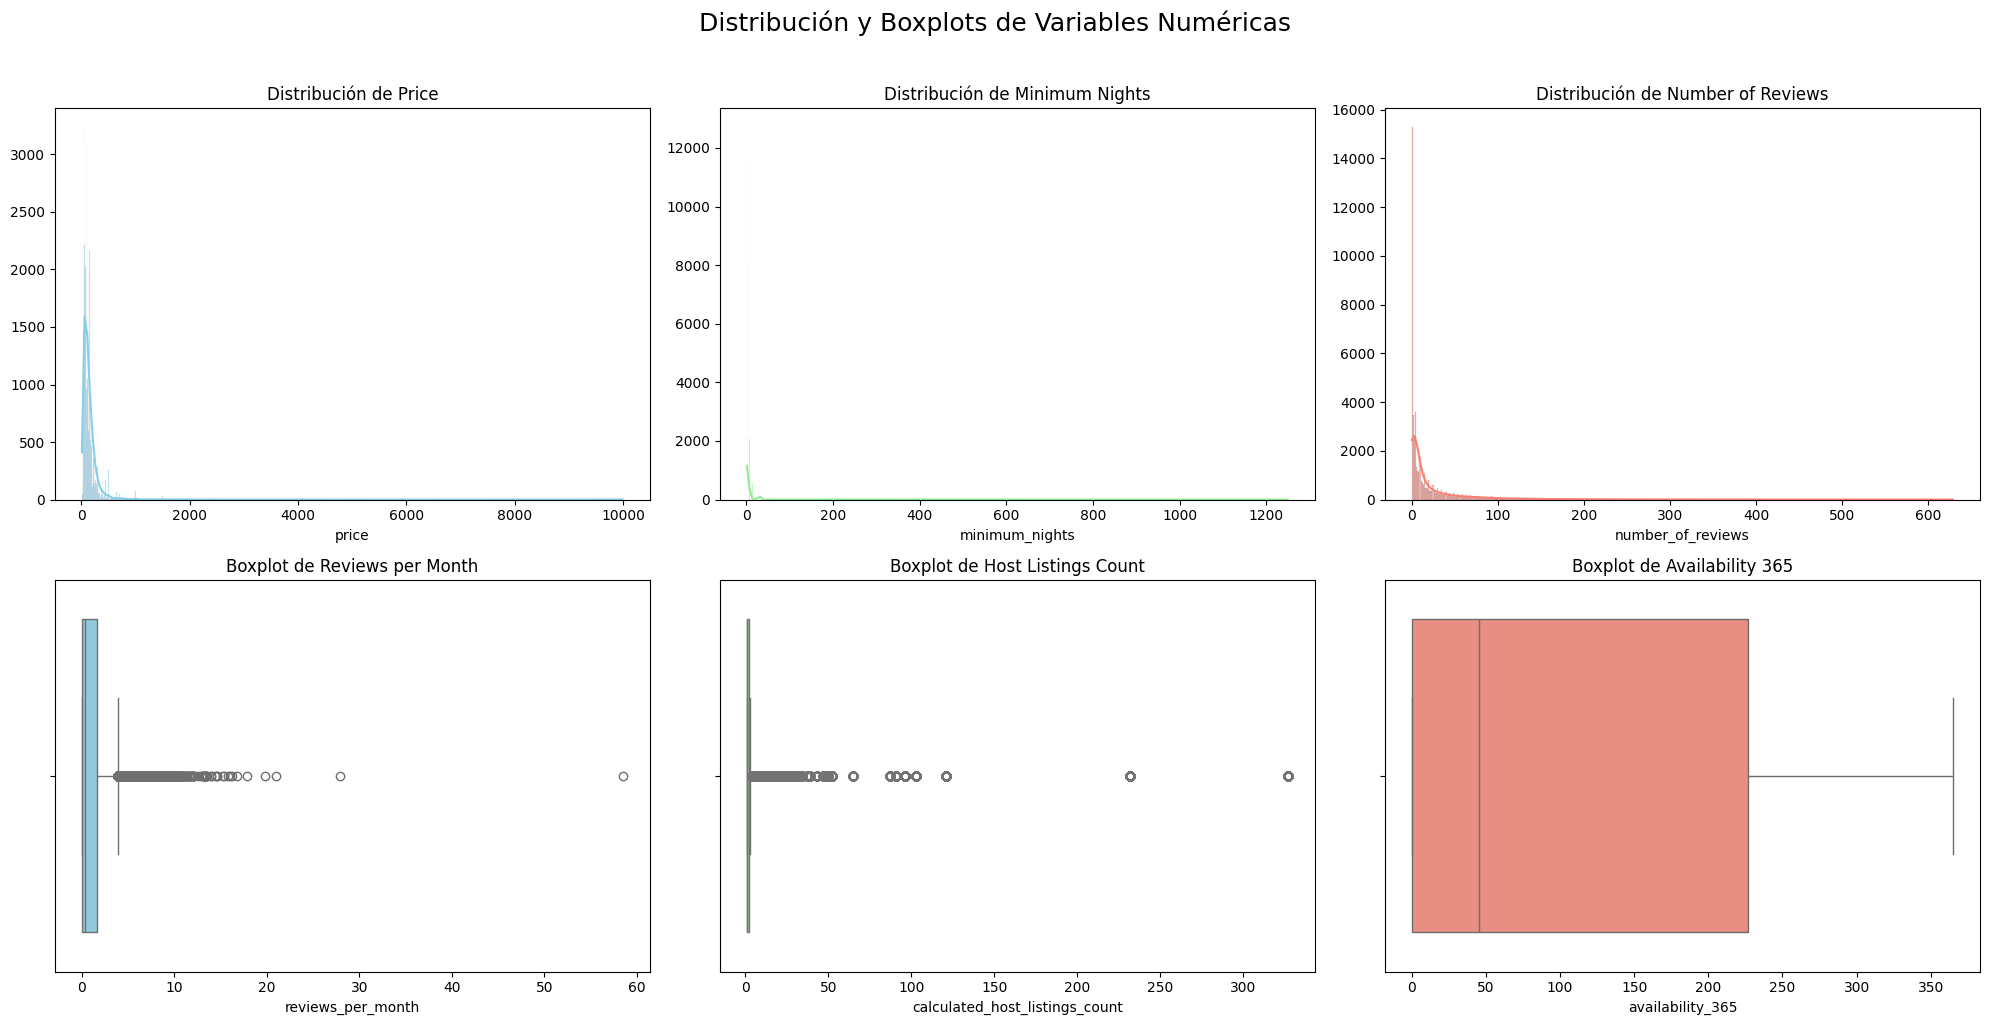

In [186]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(data=df, x='price', kde=True, ax=axes[0,0], color='skyblue').set(ylabel=None)
sns.histplot(data=df, x='minimum_nights', kde=True, ax=axes[0,1], color='lightgreen').set(ylabel=None)
sns.histplot(data=df, x='number_of_reviews', kde=True, ax=axes[0,2], color='salmon').set(ylabel=None)
sns.boxplot(data=df, x='reviews_per_month', ax=axes[1,0], color='skyblue')
sns.boxplot(data=df, x='calculated_host_listings_count', ax=axes[1,1], color='lightgreen')
sns.boxplot(data=df, x='availability_365', ax=axes[1,2], color='salmon')

axes[0,0].set_title('Distribución de Price')
axes[0,1].set_title('Distribución de Minimum Nights')
axes[0,2].set_title('Distribución de Number of Reviews')
axes[1,0].set_title('Boxplot de Reviews per Month')
axes[1,1].set_title('Boxplot de Host Listings Count')
axes[1,2].set_title('Boxplot de Availability 365')

plt.suptitle("Distribución y Boxplots de Variables Numéricas", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


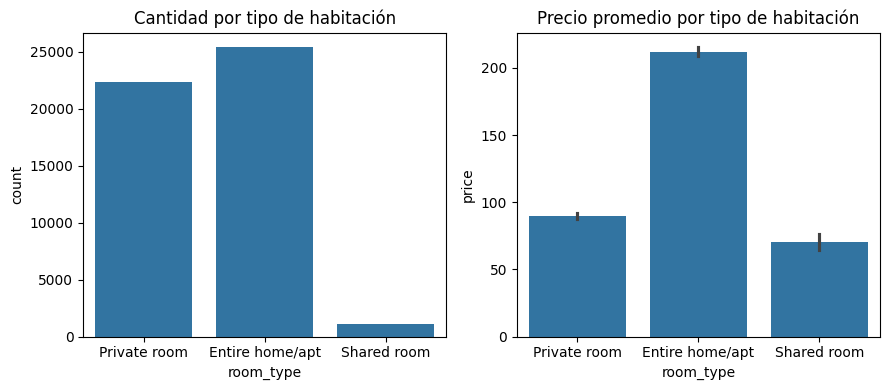

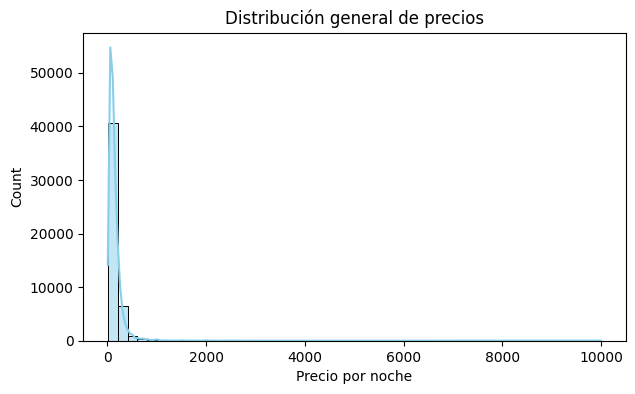

In [187]:
fig, ax = plt.subplots(1, 2, figsize=(9,4))
sns.countplot(data=df, x='room_type', ax=ax[0])
sns.barplot(data=df, x='room_type', y='price', estimator=np.mean, ax=ax[1])
ax[0].set_title("Cantidad por tipo de habitación")
ax[1].set_title("Precio promedio por tipo de habitación")
plt.tight_layout()
plt.show()


plt.figure(figsize=(7,4))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title("Distribución general de precios")
plt.xlabel("Precio por noche")
plt.show()


-Aunque las habitaciones privadas son las más comunes, los apartamentos completos tienen precios promedio mucho más altos.

-La mayoría de los alojamientos cuestan menos de 200 $, pero hay pocos con precios muy elevados.

/tmp/ipykernel_4496/3114341916.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='room_type', y='price', estimator=np.mean, ax=axes[1,0], palette="flare")


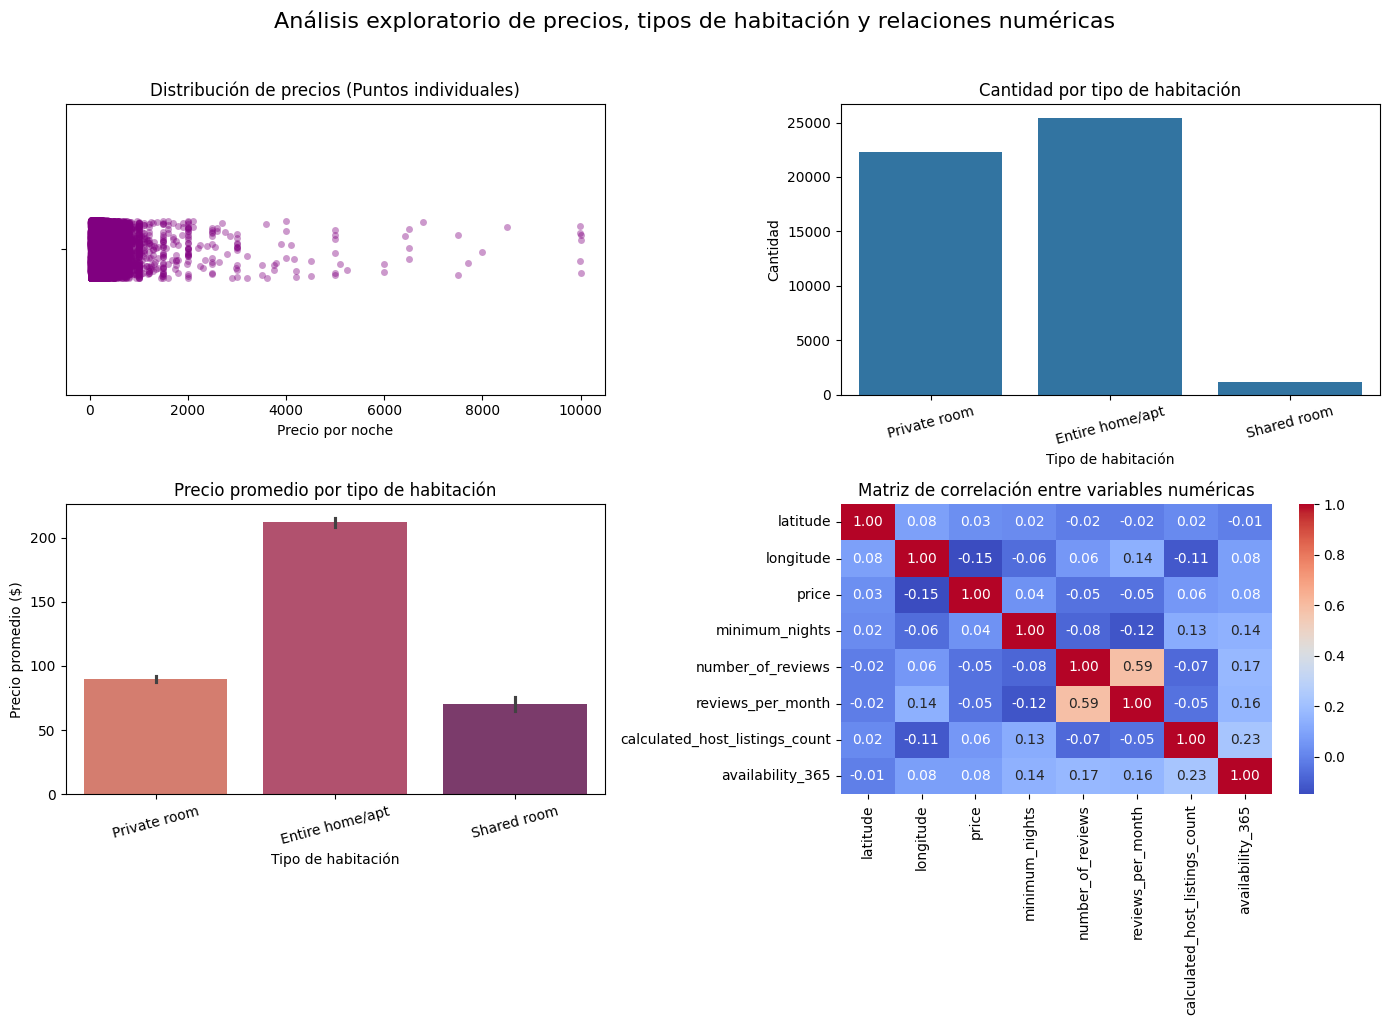

In [188]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribución general de precios
sns.stripplot(data=df, x='price', alpha=0.4, color='purple', ax=axes[0,0])
axes[0,0].set_title("Distribución de precios (Puntos individuales)")
axes[0,0].set_xlabel("Precio por noche")
axes[0,0].set_ylabel("")

# Cantidad de alojamientos por tipo
sns.countplot(data=df, x='room_type', ax=axes[0,1])
axes[0,1].set_title("Cantidad por tipo de habitación")
axes[0,1].set_xlabel("Tipo de habitación")
axes[0,1].set_ylabel("Cantidad")
axes[0,1].tick_params(axis='x', rotation=15)

# Precio promedio por tipo de habitación
sns.barplot(data=df, x='room_type', y='price', estimator=np.mean, ax=axes[1,0], palette="flare")
axes[1,0].set_title("Precio promedio por tipo de habitación")
axes[1,0].set_xlabel("Tipo de habitación")
axes[1,0].set_ylabel("Precio promedio ($)")
axes[1,0].tick_params(axis='x', rotation=15)

# Matriz de correlación de variables numéricas
num_cols = df.select_dtypes(include=['int64', 'float64'])
corr = num_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1,1])
axes[1,1].set_title("Matriz de correlación entre variables numéricas")

plt.suptitle("Análisis exploratorio de precios, tipos de habitación y relaciones numéricas", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

La distribución de precios es asimétrica, con predominio de alojamientos económicos y pocos de alto valor.

Los Entire home/apt suelen ser los más caros, pero también los que podrían tener más riesgo si la demanda es baja.

Los Private rooms representan un equilibrio entre cantidad de oferta y precio medio, lo que los hace atractivos para inversión moderada.

No se observan correlaciones numéricas fuertes con el precio, lo que sugiere que otras variables cualitativas o geográficas pueden ser más determinantes en la fijación del precio.

/tmp/ipykernel_4496/1467944566.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='neighbourhood_group', y='price', estimator=np.mean, palette="crest")


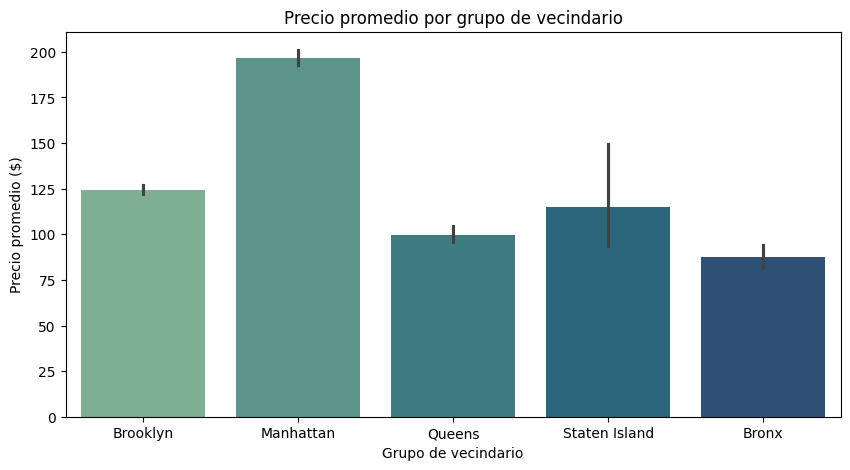

In [189]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='neighbourhood_group', y='price', estimator=np.mean, palette="crest")
plt.title("Precio promedio por grupo de vecindario")
plt.xlabel("Grupo de vecindario")
plt.ylabel("Precio promedio ($)")
plt.show()


Manhattan es la zona más cara, seguida de Brooklyn.

Bronx y Queens ofrecen precios considerablemente más bajos, lo que los hace atractivos para inversiones económicas.

## HACEMOS SPLIT

In [190]:
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [191]:
X_train

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
13827,Brooklyn,Bedford-Stuyvesant,40.69363,-73.94805,Private room,3,33,2018-09-03,0.81,1,365
38124,Brooklyn,Greenpoint,40.73008,-73.96062,Private room,2,2,2019-01-05,0.27,1,0
20418,Brooklyn,Bedford-Stuyvesant,40.68322,-73.93073,Entire home/apt,5,47,2019-06-01,1.53,2,91
28119,Brooklyn,Park Slope,40.67913,-73.97477,Entire home/apt,2,45,2019-06-09,2.34,1,302
9183,Queens,Sunnyside,40.74439,-73.92163,Shared room,1,1,2015-06-28,0.02,2,0
...,...,...,...,...,...,...,...,...,...,...,...
5294,Manhattan,Harlem,40.82654,-73.94620,Entire home/apt,1,10,2019-06-12,0.17,1,297
1726,Manhattan,West Village,40.73364,-74.00539,Entire home/apt,2,68,2019-07-01,0.92,1,63
35653,Manhattan,Upper East Side,40.78132,-73.95148,Entire home/apt,1,4,2019-06-30,0.44,2,24
25720,Manhattan,Financial District,40.70949,-74.01438,Entire home/apt,30,22,2019-06-30,1.00,1,81


In [192]:
X_train.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [193]:
y_test.shape

(9777,)

In [194]:
X_train.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
13827,Brooklyn,Bedford-Stuyvesant,40.69363,-73.94805,Private room,3,33,2018-09-03,0.81,1,365
38124,Brooklyn,Greenpoint,40.73008,-73.96062,Private room,2,2,2019-01-05,0.27,1,0
20418,Brooklyn,Bedford-Stuyvesant,40.68322,-73.93073,Entire home/apt,5,47,2019-06-01,1.53,2,91
28119,Brooklyn,Park Slope,40.67913,-73.97477,Entire home/apt,2,45,2019-06-09,2.34,1,302
9183,Queens,Sunnyside,40.74439,-73.92163,Shared room,1,1,2015-06-28,0.02,2,0


In [195]:
y_train

13827     70
38124     70
20418    115
28119    199
9183      50
        ... 
5294     125
1726     189
35653     59
25720    250
28947    225
Name: price, Length: 39107, dtype: int64

## FACTORIZAMOS

In [196]:
df['room_type_facto'] = pd.factorize(df['room_type'])[0]
df['neighbourhood_group_facto'] = pd.factorize(df['neighbourhood_group'])[0]
df[['room_type', 'room_type_facto', 'neighbourhood_group', 'neighbourhood_group_facto']].head(5)

,room_type,room_type_facto,neighbourhood_group,neighbourhood_group_facto
0,Private room,0,Brooklyn,0
1,Entire home/apt,1,Manhattan,1
2,Private room,0,Manhattan,1
3,Entire home/apt,1,Brooklyn,0
4,Entire home/apt,1,Manhattan,1


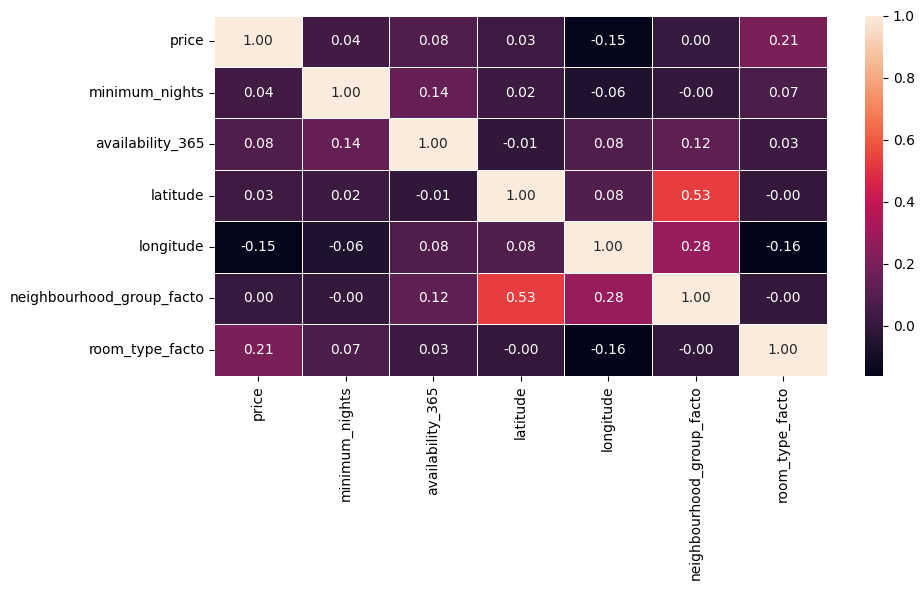

In [197]:
corr = df[['price', 'minimum_nights','availability_365','latitude','longitude','neighbourhood_group_facto','room_type_facto']].corr()
fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot=True, linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

In [198]:
df.shape

(48884, 14)

## SCALING

# NORMALIZACIÓN

In [199]:
norm_scaler = StandardScaler()

num_variables = ['minimum_nights','availability_365','latitude','longitude','neighbourhood_group_facto','room_type_facto']
norm_features = norm_scaler.fit_transform(df[num_variables])

df_norm = pd.DataFrame(norm_features,
                       index=df.index,
                       columns=num_variables)
df_norm.head()

,minimum_nights,availability_365,latitude,longitude,neighbourhood_group_facto,room_type_facto
0,-0.293969,1.916192,-1.493872,-0.437504,-0.932139,-1.047934
1,-0.293969,1.840219,0.452352,-0.684480,0.252303,0.799890
2,-0.196465,1.916192,1.468284,0.222616,0.252303,-1.047934
3,-0.293969,0.617056,-0.803442,-0.164313,-0.932139,0.799890
4,0.144799,-0.856818,1.275551,0.177337,0.252303,0.799890


In [200]:
df_norm


,minimum_nights,availability_365,latitude,longitude,neighbourhood_group_facto,room_type_facto
0,-0.293969,1.916192,-1.493872,-0.437504,-0.932139,-1.047934
1,-0.293969,1.840219,0.452352,-0.684480,0.252303,0.799890
2,-0.196465,1.916192,1.468284,0.222616,0.252303,-1.047934
3,-0.293969,0.617056,-0.803442,-0.164313,-0.932139,0.799890
4,0.144799,-0.856818,1.275551,0.177337,0.252303,0.799890
...,...,...,...,...,...,...
48879,-0.245217,-0.788443,-0.924657,0.048216,-0.932139,-1.047934
48880,-0.147713,-0.583316,-0.497196,0.411748,-0.932139,-1.047934
48881,0.144799,-0.651692,1.573362,0.075947,0.252303,0.799890
48882,-0.293969,-0.841624,0.523688,-0.843715,0.252303,2.647714


# Escalado Mínimo-Máximo

In [201]:
min_max_scaler = MinMaxScaler()

num_variables = ['minimum_nights','availability_365','latitude','longitude','neighbourhood_group_facto','room_type_facto']
min_max_features = min_max_scaler.fit_transform(df[num_variables])

df_min_max = pd.DataFrame(min_max_features,
                          index=df.index,
                          columns=num_variables)
df_min_max

,minimum_nights,availability_365,latitude,longitude,neighbourhood_group_facto,room_type_facto
0,0.000000,1.000000,0.357393,0.511921,0.00,0.0
1,0.000000,0.972603,0.614199,0.490469,0.25,0.5
2,0.001601,1.000000,0.748252,0.569257,0.25,0.0
3,0.000000,0.531507,0.448496,0.535649,0.00,0.5
4,0.007206,0.000000,0.722820,0.565324,0.25,0.5
...,...,...,...,...,...,...
48879,0.000801,0.024658,0.432502,0.554109,0.00,0.0
48880,0.002402,0.098630,0.488906,0.585684,0.00,0.0
48881,0.007206,0.073973,0.762117,0.556517,0.25,0.5
48882,0.000000,0.005479,0.623612,0.476639,0.25,1.0


In [202]:
df_min_max.columns

Index(['minimum_nights', 'availability_365', 'latitude', 'longitude',
       'neighbourhood_group_facto', 'room_type_facto'],
      dtype='object')

## Encoding - Codificación de variables categóricas

In [203]:
X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

label_encoder_room_type = LabelEncoder()

label_encoder_room_type.fit(X_train['room_type'])

X_train_cat_le['room_type_le'] = label_encoder_room_type.transform(X_train['room_type'])
X_test_cat_le['room_type_le'] = label_encoder_room_type.transform(X_test['room_type'])


label_encoder_neighbourhood_group = LabelEncoder()

label_encoder_neighbourhood_group.fit(X_train['neighbourhood_group'])

X_train_cat_le['neighbourhood_group_le'] = label_encoder_neighbourhood_group.transform(X_train['neighbourhood_group'])  
X_test_cat_le['neighbourhood_group_le'] = label_encoder_neighbourhood_group.transform(X_test['neighbourhood_group'])


X_train_cat_le.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_le,neighbourhood_group_le
13827,Brooklyn,Bedford-Stuyvesant,40.69363,-73.94805,Private room,3,33,2018-09-03,0.81,1,365,1,1
38124,Brooklyn,Greenpoint,40.73008,-73.96062,Private room,2,2,2019-01-05,0.27,1,0,1,1
20418,Brooklyn,Bedford-Stuyvesant,40.68322,-73.93073,Entire home/apt,5,47,2019-06-01,1.53,2,91,0,1
28119,Brooklyn,Park Slope,40.67913,-73.97477,Entire home/apt,2,45,2019-06-09,2.34,1,302,0,1
9183,Queens,Sunnyside,40.74439,-73.92163,Shared room,1,1,2015-06-28,0.02,2,0,2,3


One_hot encoder

In [ ]:

cat_variables = ["room_type", "neighbourhood_group"]

onehot_encoder = OneHotEncoder(sparse_output=False)

onehot_encoder.fit(X_train[cat_variables])

X_train_cat_ohe = onehot_encoder.transform(X_train[cat_variables])
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe,
                               index=X_train.index,
                               columns=onehot_encoder.get_feature_names_out(cat_variables))

X_test_cat_ohe = onehot_encoder.transform(X_test[cat_variables])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe,
                              index=X_test.index,
                              columns=onehot_encoder.get_feature_names_out(cat_variables))

X_train_cat_ohe.head()

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
13827,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
38124,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
20418,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28119,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9183,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## selección de características

In [211]:
selection_model = SelectKBest(f_classif, k = 4)
selection_model.fit(X_train_cat_ohe, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_cat_ohe), columns = X_train_cat_ohe.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_cat_ohe), columns = X_test_cat_ohe.columns.values[ix])

X_train_sel.head()

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Manhattan
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0
